In [ ]:
import pandas as pd
import numpy as np

avespend = pd.read_csv('avespend.CSV', encoding='cp949')
tourist = pd.read_csv('tourist.csv', encoding='cp949')

In [ ]:
#데이터프레임에서 필요한 열만 선택하기
#averege_spend.csv 파일에서는 국가, 목적, 나라, 각 년도별 평균값
#tourist_data.csv 파일에서는 국가와 년도
s_avespend = avespend[['통계분류(1)', '통계분류(2)', '2017.9', '2018.8', '2019.8', '2020.9','2021.6']]
s_tourist = tourist[['Nations', '2017', '2018', '2019', '2020', '2021']]

#컬럼명 깔끔하게 정리
new_columns = {
    '통계분류(1)': '',
    '통계분류(2)': '국가',
    '2017.9': '2017',
    '2018.8': '2018',
    '2019.8': '2019',
    '2020.9': '2020',
    '2021.6': '2021'
}

s_avespend = s_avespend.rename(columns=new_columns)
#필요없는 행 삭제
s_avespend = s_avespend.drop([0])

print(s_avespend)
print(s_tourist)

               국가   2017   2018   2019   2020     2021
1    전체        소계  270.4  254.8  245.4  166.5   264.37
2    국가        일본  217.8  224.6  221.5  101.9   149.71
3   NaN        중국    394  374.4  340.9  118.8   101.16
4   NaN        홍콩  288.6  218.4  203.3      -  1737.29
5   NaN        대만  259.2  216.2  202.4    165   161.49
6   NaN        미국  161.9  147.6  159.3  171.2   275.75
7  방한목적  여가/위락/휴식  267.5  270.1  266.9  140.7   297.96
         Nations   2017   2018   2019  2020  2021
0          Japan  231.1  294.8  327.1  43.0   1.5
1          China  416.9  478.9  602.3  68.6  17.0
2  United States   86.8   96.7  104.4  22.0  20.4
3      Hong Kong   65.8   68.3   69.4   8.8   0.1
4         Taiwan   92.5  111.5  126.0  16.6   0.4


In [ ]:
df1 = s_avespend.loc[2:6, '2017':'2021']  # 첫 번째 데이터프레임의 2~6행, 2017~2021열을 추출
df2 = s_tourist.loc[0:4, '2017':'2021']   # 두 번째 데이터프레임의 0~4행, 2017~2021열을 추출

print(df1, df2)

    2017   2018   2019   2020     2021
2  217.8  224.6  221.5  101.9   149.71
3    394  374.4  340.9  118.8   101.16
4  288.6  218.4  203.3      -  1737.29
5  259.2  216.2  202.4    165   161.49
6  161.9  147.6  159.3  171.2   275.75     2017   2018   2019  2020  2021
0  231.1  294.8  327.1  43.0   1.5
1  416.9  478.9  602.3  68.6  17.0
2   86.8   96.7  104.4  22.0  20.4
3   65.8   68.3   69.4   8.8   0.1
4   92.5  111.5  126.0  16.6   0.4


In [ ]:
df1 = df1.apply(pd.to_numeric, errors='coerce')
df2 = df2.apply(pd.to_numeric, errors='coerce')

df_result = pd.DataFrame()

# 같은 위치에 있는 값들을 곱하여 df_result에 저장
for year in df1.columns:
    df_result[year] = df1[year] * df2[year]

df1.index = df2.index
df1.columns = df2.columns

print(df_result)

        2017       2018       2019     2020       2021
0   50333.58   66212.08   72452.65  4381.70    224.565
1  164258.60  179300.16  205324.07  8149.68   1719.720
2   25050.48   21119.28   21224.52      NaN  35440.716
3   17055.36   14766.46   14046.56  1452.00     16.149
4   14975.75   16457.40   20071.80  2841.92    110.300


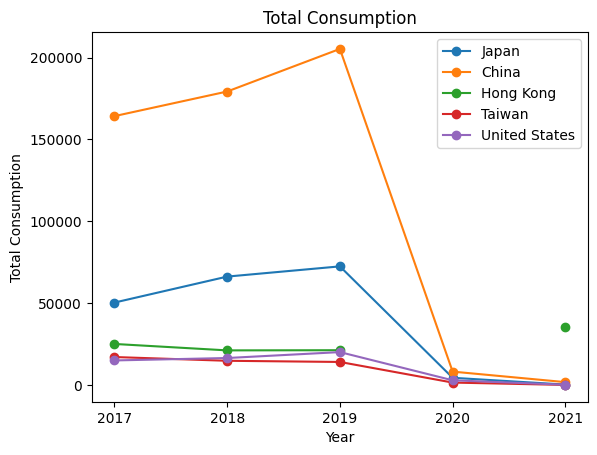

In [ ]:
import matplotlib.pyplot as plt

# Set the data for the graph
years = ['2017', '2018', '2019', '2020', '2021']
values = [
    [50333.58, 66212.08, 72452.65, 4381.70, 224.565],
    [164258.60, 179300.16, 205324.07, 8149.68, 1719.720],
    [25050.48, 21119.28, 21224.52, None, 35440.716],
    [17055.36, 14766.46, 14046.56, 1452.00, 16.149],
    [14975.75, 16457.40, 20071.80, 2841.92, 110.300]
]

countries = ['Japan', 'China', 'Hong Kong', 'Taiwan', 'United States']

# Create the graph
fig, ax = plt.subplots()

# Draw the line graph
for i, row in enumerate(values):
    ax.plot(years, row, label=countries[i], marker='o')

# Set the title and labels for the graph
ax.set_title('Total Consumption')
ax.set_xlabel('Year')
ax.set_ylabel('Total Consumption')
ax.legend()

# Display the graph
plt.show()
